1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
Health status of the plant: Healthy
Prediction confidence: 0.8406829


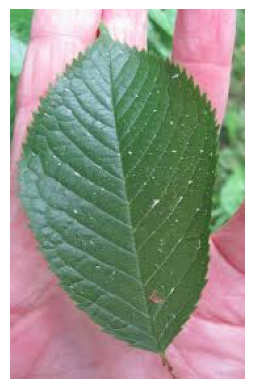

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the Keras model
model = tf.keras.models.load_model("/content/drive/MyDrive/best_cnn_model.keras")

# Define the list of class names
folders = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot',
    'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Load and preprocess the image
def load_image(img_path, target_size):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(target_size)
    img = np.array(img, dtype=np.float32)
    img = img / 255.0  # Normalize if required by model
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Specify the path to your image
image_path = "/content/images (1).jpeg"  # Replace with your image file name
target_size = model.input_shape[1:3]  # Get the input size of the model

# Preprocess the image
input_data = load_image(image_path, target_size)

# Run the model and get predictions
output_data = model.predict(input_data)

# Identify the class with the highest confidence
predicted_index = np.argmax(output_data)  # Get the index of the highest confidence score
predicted_class = folders[predicted_index]  # Map index to class name
confidence = output_data[0][predicted_index]  # Confidence score for the predicted class

# Determine if the plant is healthy or diseased
if confidence > 0.5:
  if "healthy" in predicted_class:
    health_status = "Healthy"
  else:
    health_status = "Diseased"
else :
  if "healthy" in predicted_class:
    health_status = "Healthy (Unsure)"
  else:
    health_status = "Diseased (Unsure)"
# Print the health status
print("Health status of the plant:", health_status)
print("Prediction confidence:", confidence)

# Optionally display the image
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()

In [ ]:
def check_disease_risk(temp, hum):
    # Thresholds for disease likelihood - adjust as needed
    if hum > 70 and temp > 25:
        return "High risk for fungal disease"
    elif hum > 70 and temp < 15:
        return "High risk for bacterial disease"
    elif hum > 40 and 20 <= temp <= 25:
        return "Moderate risk for disease"
    else:
        return "Low risk for disease"

# Get input from the user
try:
    temperature = float(input("Enter the temperature in °C: "))
    humidity = float(input("Enter the humidity percentage: "))

    # Get disease risk assessment
    risk_assessment = check_disease_risk(temperature, humidity)
    print("Disease Risk Assessment:", risk_assessment)

except ValueError:
    print("Invalid input. Please enter numeric values for temperature and humidity.")


Enter the temperature in °C: 30.50
Enter the humidity percentage: 66.00
Disease Risk Assessment: Low risk for disease
